<a href="https://colab.research.google.com/github/VINY1958/polars/blob/main/bds_polars_002_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src=(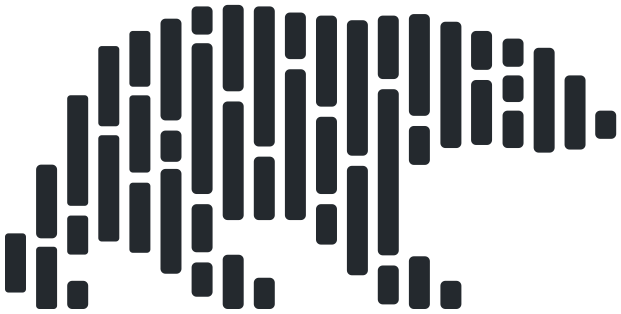)


 # **<font color="#07a8ed">Empezando a utilizar Polars 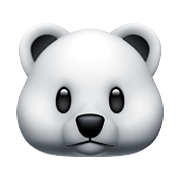 </font>**

In [ ]:
!pip install polars -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.2/33.2 MB 53.8 MB/s eta 0:00:00
  Attempting uninstall: polars
    Found existing installation: polars 1.7.1
    Uninstalling polars-1.7.1:
      Successfully uninstalled polars-1.7.1


In [ ]:
import polars as pl

In [ ]:
from datetime import datetime

# pyarray

In [ ]:
!pip install pyarray

  Preparing metadata (setup.py) ... done
  Created wheel for pyarray: filename=pyarray-0.2-py3-none-any.whl size=3483 sha256=a8f32cde9a7a9ace1023c3ed908e8156f58d0e95a15c60140b22705668e06c51
  Stored in directory: /root/.cache/pip/wheels/ee/ee/6f/4967e8b41e424c1cf5156808bda35a1a70b38f4b5ccf71718a
Successfully built pyarray


In [ ]:
import pyarray

<p align="justify"> 👀 Por convención, así se importa <code>Pandas</code>:  </p>

In [ ]:
import numpy as np
import pandas as pd

<p align="justify"> 👀 Pero como vamos a usar mucho los <code>DataFrame</code> y las <code>Series</code> de <code>Pandas</code>, entonces podemos hacer esto:  </p>

In [ ]:
from pandas import Series, DataFrame

 # **<font color="#07a8ed">Aritmética y alineación de datos</font>**

<p align="justify">
Las estructuras de datos que debemos manejar son: <code>Series</code> y <code>DataFrame</code>. Si bien no son una solución universal para todos los problemas que se pueden plantear, proporcionan una base sólida para una amplia variedad de tareas de datos.</p>

In [ ]:
ventas = pd.Series([230.1, 44.5, 17.2, 151.5, 180.8, 68.90, 144.90], name="ventas")
periodico = pd.Series([22.1, 10.4, 9.3, 18.5, 12.9], name="periodico")
radio = pd.Series([37.8, 39.3, 45.9, 41.3, 10.8, 41.9, 36.9], name="radio")
tv = pd.Series([69.2, 45.1, 69.3, 58.5, 58.4, 52.5], name="tv")

In [ ]:
ventas

,ventas
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
5,68.9
6,144.9


In [ ]:
type(ventas)

pandas.core.series.Series

In [ ]:
ventas.name

'ventas'

In [ ]:
ventas_pl = pl.Series("venta",[230.1, 44.5, 17.2, 151.5, 180.8, 68.90, 144.90])
periodico_pl = pl.Series("periodico",[22.1, 10.4, 9.3, 18.5, 12.9])
radio_pl = pl.Series("radio",[37.8, 39.3, 45.9, 41.3, 10.8, 41.9, 36.9])
tv_pl = pl.Series("tv",[69.2, 45.1, 69.3, 58.5, 58.4, 52.5])

In [ ]:
ventas_pl

venta
f64
230.1
44.5
17.2
151.5
180.8
68.9
144.9


In [ ]:
type(ventas_pl)

polars.series.series.Series

In [ ]:
ventas_pl.name

'venta'

<p align="justify">
<code>Pandas</code> simplifica el trabajo con objetos que tienen diferentes índices, cuando agregamos objetos, si el índice de uno de esos objetos no es el mismo, el índice resultante será la unión de los pares de índices.<br><br>Por ejemplo:</p>

In [ ]:
print(f"La serie {periodico.name} tiene {len(periodico)} elementos \nLa serie {radio.name} tiene {len(radio)} elementos \nLa serie {tv.name} tiene {len(tv)} elementos")

La serie periodico tiene 5 elementos 
La serie radio tiene 7 elementos 
La serie tv tiene 6 elementos


In [ ]:
print(f"La serie {periodico_pl.name} tiene {len(periodico_pl)} elementos \nLa serie {radio_pl.name} tiene {len(radio_pl)} elementos \nLa serie {tv_pl.name} tiene {len(tv_pl)} elementos")

La serie periodico tiene 5 elementos 
La serie radio tiene 7 elementos 
La serie tv tiene 6 elementos


In [ ]:
# Get the maximum length among the series
max_len = max(len(periodico_pl), len(radio_pl), len(tv_pl))

# Extend the series to the maximum length, filling with nulls
periodico_pl = periodico_pl.extend_constant(None, max_len - len(periodico_pl))
radio_pl = radio_pl.extend_constant(None, max_len - len(radio_pl))
tv_pl = tv_pl.extend_constant(None, max_len - len(tv_pl))

# Now create the DataFrame
dfpolars = pl.DataFrame(
    {
        "periodico": periodico_pl,
        "radio": radio_pl,
        "tv": tv_pl
    }
)

In [ ]:
dfpolars

periodico,radio,tv
f64,f64,f64
22.1,37.8,69.2
10.4,39.3,45.1
9.3,45.9,69.3
18.5,41.3,58.5
12.9,10.8,58.4
null,41.9,52.5
null,36.9,null


In [ ]:
multimedia = pl.col("periodico") + pl.col("radio") + pl.col("tv")

In [ ]:
multimedia

<Expr ['[([(col("periodico")) + (col("…'] at 0x782F8A694460>

In [ ]:
dfpolars= dfpolars.with_columns(
    (pl.col("periodico") + pl.col("radio") + pl.col("tv")).alias("multimedia")
)

In [ ]:
dfpolars

periodico,radio,tv,multimedia
f64,f64,f64,f64
22.1,37.8,69.2,129.1
10.4,39.3,45.1,94.8
9.3,45.9,69.3,124.5
18.5,41.3,58.5,118.3
12.9,10.8,58.4,82.1
null,41.9,52.5,null
null,36.9,null,null


<p align="justify">
La alineación de datos internos introduce valores faltantes en las ubicaciones de las etiquetas que no se superponen, es decir, aquellas series que tienen más elemenos, o elementos que no están en otras series.</p>

<p align="justify"> 👀 En el caso de los <code>DataFrame</code>, la alineación se realiza tanto en filas como en columnas:
</p>

In [ ]:
ventas1 = pd.Series([1200, 4250, 3090, 3400], index=[2019,2020,2022,2023])
costo1 = pd.Series([800, 1900, 1200, 1450], index=[2019,2020,2022,2023])
bruto1 = ventas1 - costo1

In [ ]:
ventas1_pl = pl.Series([1200, 4250, 3090, 3400], dtype=pl.Int64)

In [ ]:
ventas1_pl = ventas1_pl.alias("ventas")

In [ ]:
ventas1_pl

ventas
i64
1200
4250
3090
3400


In [ ]:
costo1_pl = pl.Series([800, 1900, 1200, 1450], dtype=pl.Int64)

In [ ]:
costo1_pl = costo1_pl.alias("costo")

In [ ]:
costo1_pl

costo
i64
800
1900
1200
1450


In [ ]:
bruto1_pl = ventas1_pl - costo1_pl

In [ ]:
bruto1_pl = bruto1_pl.alias("bruto")

In [ ]:
bruto1_pl

bruto
i64
400
2350
1890
1950


In [ ]:
ventas2 = pd.Series([4250, 2050, 3400], index=[2020,2021,2023])
costo2 = pd.Series([1900, 1000, 1450], index=[2020,2021,2023])
bruto2 = ventas2 - costo2

In [ ]:
sucursal1 = {"ventas":ventas1,"costo":costo1,"bruto":bruto1}
sucursal2 = {"ventas":ventas2,"costo":costo2,"bruto":bruto2}

In [ ]:
sucursal1 = pd.DataFrame(sucursal1).T
sucursal2 = pd.DataFrame(sucursal2).T

In [ ]:
sucursal1

,2019,2020,2022,2023
ventas,1200,4250,3090,3400
costo,800,1900,1200,1450
bruto,400,2350,1890,1950


In [ ]:
sucursal2

,2020,2021,2023
ventas,4250,2050,3400
costo,1900,1000,1450
bruto,2350,1050,1950


In [ ]:
sucursal1 + sucursal2

,2019,2020,2021,2022,2023
ventas,NaN,8500,NaN,NaN,6800
costo,NaN,3800,NaN,NaN,2900
bruto,NaN,4700,NaN,NaN,3900


###Polars

In [ ]:
import polars as pl

In [ ]:
ventas2_pl = pl.Series([4250, 2050, 3400])

In [ ]:
ventas2_pl = ventas2_pl.alias("ventas")

In [ ]:
ventas2_pl

ventas
i64
4250
2050
3400


In [ ]:
ventas2_pl.index=[2020,2021,2023]

In [ ]:
print(ventas2_pl)

shape: (3,)
Series: 'ventas' [i64]
[
	4250
	2050
	3400
]


In [ ]:
ventas2_pl.index

[2020, 2021, 2023]

In [ ]:
costo2_pl = pl.Series([1900, 1000, 1450])

In [ ]:
costo2_pl = costo2_pl.alias("costos")

In [ ]:
costo2_pl

costos
i64
1900
1000
1450


In [ ]:
costo2_pl.index=[2020,2021,2023]

In [ ]:
print(costo2_pl)

shape: (3,)
Series: 'costos' [i64]
[
	1900
	1000
	1450
]


In [ ]:
costo2_pl.index

[2020, 2021, 2023]

In [ ]:
bruto2_pl = ventas2_pl - costo2_pl

In [ ]:
bruto2_pl

ventas
i64
2350
1050
1950


In [ ]:
bruto2_pl = bruto2_pl.alias("bruto")

In [ ]:
bruto2_pl

bruto
i64
2350
1050
1950


sucursal1 = {"ventas":ventas1,"costo":costo1,"bruto":bruto1}
sucursal2 = {"ventas":ventas2,"costo":costo2,"bruto":bruto2}

In [ ]:
sucursal1_pl = {"ventas":ventas1_pl,"costo":costo1_pl,"bruto":bruto1_pl}


In [ ]:
sucursal2_pl={"ventas":ventas2_pl,"costo":costo2_pl,"bruto":bruto2_pl}

In [ ]:
print(sucursal1_pl)

{'ventas': shape: (4,)
Series: 'ventas' [i64]
[
	1200
	4250
	3090
	3400
], 'costo': shape: (4,)
Series: 'costo' [i64]
[
	800
	1900
	1200
	1450
], 'bruto': shape: (4,)
Series: 'bruto' [i64]
[
	400
	2350
	1890
	1950
]}


In [ ]:
print(sucursal2_pl)

{'ventas': shape: (3,)
Series: 'ventas' [i64]
[
	4250
	2050
	3400
], 'costo': shape: (3,)
Series: 'costos' [i64]
[
	1900
	1000
	1450
], 'bruto': shape: (3,)
Series: 'bruto' [i64]
[
	2350
	1050
	1950
]}


In [ ]:
sucursal1_pl = pl.DataFrame(sucursal1_pl)
sucursal2_pl = pl.DataFrame(sucursal2_pl)

In [ ]:
sucursal1_pl.transpose()

column_0,column_1,column_2
i64,i64,i64
1200,800,400
4250,1900,2350
3090,1200,1890
3400,1450,1950


In [ ]:
sucursal1_pl = sucursal1_pl.transpose()

In [ ]:
sucursal1_pl.columns = sucursal1_pl.columns=[ "ventas", "costo", "bruto"]

In [ ]:
sucursal1_pl

ventas,costo,bruto
i64,i64,i64
1200,800,400
4250,1900,2350
3090,1200,1890
3400,1450,1950


In [ ]:
sucursal2_pl = sucursal2_pl.transpose()

In [ ]:
sucursal2_pl

column_0,column_1,column_2
i64,i64,i64
4250,1900,2350
2050,1000,1050
3400,1450,1950


In [ ]:
sucursal2_pl.columns = sucursal2_pl.columns=[ "ventas", "costo", "bruto"]

In [ ]:
sucursal2_pl

ventas,costo,bruto
i64,i64,i64
4250,1900,2350
2050,1000,1050
3400,1450,1950


<p align="justify"> 👀 Dado que hay columnas (ejercicios comerciales) en las sucursales que no están en ambos objetos <code>DataFrame</code>, aparecen como faltantes en el resultado (sumatoria de las sucursales). <br><br>Lo mismo sucedería para las filas con etiquetas que no son comunes a los objetos que se incluyen en la operación aritmética.
</p>

 # **<font color="#07a8ed">Métodos aritméticos, valores de relleno y operaciones</font>**

<p align="justify"> En las operaciones aritméticas entre objetos indexados de manera diferente, es posible completar valores con un valor especial, como $0$, cuando se encuentra una etiqueta de eje en un objeto pero no en el otro. <br><br>Aquí hay un ejemplo en el que establecemos un valor particular, un valor nulo, usando <code>np.nan</code>:
</p>

In [ ]:
np.random.seed(123)
sucursal3 = pd.DataFrame(np.random.rand(12).reshape((3, 4)),columns=[2018,2020,2021,2023])
sucursal4 = pd.DataFrame(np.random.rand(20).reshape((4, 5)),columns=[2019,2020,2021,2022,2023])

In [ ]:
sucursal3.loc[1, 2020] = np.nan

In [ ]:
sucursal3.iloc[:,2]

,2021
0,0.226851
1,0.980764
2,0.343178


In [ ]:
sucursal3.loc[1, 2021] = sucursal3[2021].mean()

In [ ]:
sucursal3

,2018,2020,2021,2023
0,0.696469,0.286139,0.226851,0.551315
1,0.719469,NaN,0.980764,0.684830
2,0.480932,0.392118,0.343178,0.729050


In [ ]:
sucursal4

,2019,2020,2021,2022,2023
0,0.438572,0.059678,0.398044,0.737995,0.182492
1,0.175452,0.531551,0.531828,0.634401,0.849432
2,0.724455,0.611024,0.722443,0.322959,0.361789
3,0.228263,0.293714,0.630976,0.092105,0.433701


<p align="justify"> 👀 Entonces si sumamos los <code>DataFrame</code>, la alineación se realiza tanto en filas como en columnas, tal cual como vimos anteriormente:
</p>

In [ ]:
sucursal3 + sucursal4

,2018,2019,2020,2021,2022,2023
0,NaN,NaN,0.345817,0.624896,NaN,0.733806
1,NaN,NaN,NaN,1.512592,NaN,1.534262
2,NaN,NaN,1.003141,1.065621,NaN,1.090838
3,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sucursal3_pl = pl.DataFrame(
    {
        "2018": np.random.rand(12),
        "2020": np.random.rand(12),
        "2021": np.random.rand(12),
        "2023": np.random.rand(12),
    }
)

In [ ]:
sucursal3_pl= pl.DataFrame(np.random.rand(12).reshape((3, 4)), schema=["2018", "2020", "2021", "2023"])

In [ ]:
sucursal3_pl

2018,2020,2021,2023
f64,f64,f64,f64
0.854452,0.384838,0.316788,0.354265
0.171082,0.829113,0.338671,0.55237
0.578551,0.521533,0.002688,0.988345


In [ ]:
sucursal4_pl = pl.DataFrame(
    {
        "2018": np.random.rand(20),
        "2020": np.random.rand(20),
        "2021": np.random.rand(20),
        "2023": np.random.rand(20),
    }
)

In [ ]:
sucursal4_pl= pl.DataFrame(np.random.rand(20).reshape((4, 5)), schema=["2019", "2020", "2021", "2022", "2023"])

In [ ]:
sucursal4_pl

2019,2020,2021,2022,2023
f64,f64,f64,f64,f64
0.422543,0.245033,0.117398,0.301053,0.145264
0.092186,0.602932,0.364187,0.56457,0.191336
0.676906,0.215505,0.278024,0.74176,0.559738
0.334836,0.542989,0.693985,0.912132,0.580713


In [ ]:
sucursal3_pl.shape

(3, 4)

In [ ]:
sucursal4_pl.shape

(4, 5)

In [ ]:
result = pl.concat([sucursal3_pl, sucursal4_pl], how="diagonal")

In [ ]:
result

2018,2020,2021,2023,2019,2022
f64,f64,f64,f64,f64,f64
0.417291,0.989035,0.2366,0.916832,null,null
0.918397,0.091296,0.463653,0.502216,null,null
0.313669,0.04734,0.241686,0.09553,null,null
null,0.245033,0.117398,0.145264,0.422543,0.301053
null,0.602932,0.364187,0.191336,0.092186,0.56457
null,0.215505,0.278024,0.559738,0.676906,0.74176
null,0.542989,0.693985,0.580713,0.334836,0.912132


In [ ]:
sucursal3_pl

2018,2020,2021,2023
f64,f64,f64,f64
0.417291,0.989035,0.2366,0.916832
0.918397,0.091296,0.463653,0.502216
0.313669,0.04734,0.241686,0.09553


In [ ]:
sucursal4_pl

2019,2020,2021,2022,2023
f64,f64,f64,f64,f64
0.422543,0.245033,0.117398,0.301053,0.145264
0.092186,0.602932,0.364187,0.56457,0.191336
0.676906,0.215505,0.278024,0.74176,0.559738
0.334836,0.542989,0.693985,0.912132,0.580713


In [ ]:
sucursal3 + sucursal4

,2018,2019,2020,2021,2022,2023
0,NaN,NaN,0.345817,0.624896,NaN,0.733806
1,NaN,NaN,NaN,1.512592,NaN,1.534262
2,NaN,NaN,1.003141,1.065621,NaN,1.090838
3,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sucursales_pl = sucursal3_pl + sucursal4_pl

In [ ]:
sucursales_pl

2018,2020,2021,2023
f64,f64,f64,f64
0.839834,1.234068,0.353998,1.217886
1.010584,0.694229,0.82784,1.066787
0.990575,0.262845,0.519709,0.83729
null,null,null,null


In [ ]:
common_cols = list(set(sucursal3_pl.columns) & set(sucursal4_pl.columns))
stacked_df = sucursal3_pl.select(common_cols).vstack(sucursal4_pl.select(common_cols))

In [ ]:
stacked_df

2020,2023,2021
f64,f64,f64
0.989035,0.916832,0.2366
0.091296,0.502216,0.463653
0.04734,0.09553,0.241686
0.245033,0.145264,0.117398
0.602932,0.191336,0.364187
0.215505,0.559738,0.278024
0.542989,0.580713,0.693985


 ## **<font color="#07a8ed">Valores de relleno</font>**

<p align="justify"> 👀 Pero si usamos el método <code>add()</code> con el parámetro <code>fill_value</code> entonces el resultado es el siguiente:
</p>

In [ ]:
sucursal3.add(sucursal4, fill_value=0)

,2018,2019,2020,2021,2022,2023
0,0.696469,0.438572,0.345817,0.624896,0.737995,0.733806
1,0.719469,0.175452,0.531551,1.048759,0.634401,1.534262
2,0.480932,0.724455,1.003141,1.065621,0.322959,1.090838
3,NaN,0.228263,0.293714,0.630976,0.092105,0.433701


In [ ]:
sucursal4.add(sucursal3, fill_value=0)

,2018,2019,2020,2021,2022,2023
0,0.696469,0.438572,0.345817,0.624896,0.737995,0.733806
1,0.719469,0.175452,0.531551,1.048759,0.634401,1.534262
2,0.480932,0.724455,1.003141,1.065621,0.322959,1.090838
3,NaN,0.228263,0.293714,0.630976,0.092105,0.433701


<p align="justify"> 👀 De otra manera, al volver a indexar una <code>Serie</code> o un <code>DataFrame</code>, también se puede especificar un valor de relleno diferente:
</p>

In [ ]:
sucursal3

,2018,2020,2021,2023
0,0.696469,0.286139,0.226851,0.551315
1,0.719469,NaN,0.516931,0.684830
2,0.480932,0.392118,0.343178,0.729050


In [ ]:
sucursal4

,2019,2020,2021,2022,2023
0,0.438572,0.059678,0.398044,0.737995,0.182492
1,0.175452,0.531551,0.531828,0.634401,0.849432
2,0.724455,0.611024,0.722443,0.322959,0.361789
3,0.228263,0.293714,0.630976,0.092105,0.433701


In [ ]:
sucursal3.reindex(columns=sucursal4.columns, fill_value=0)

,2019,2020,2021,2022,2023
0,0,0.286139,0.226851,0,0.551315
1,0,NaN,0.516931,0,0.684830
2,0,0.392118,0.343178,0,0.729050


In [ ]:
sucursal4_cols = sucursal4_pl.columns

In [ ]:

resultado = sucursal3_pl.fill_null(0).join(sucursal4_pl, on=sucursal3_pl.columns, how="cross")

In [ ]:
resultado

2018,2020,2021,2023,2019,2020_right,2021_right,2022,2023_right
f64,f64,f64,f64,f64,f64,f64,f64,f64
0.417291,0.989035,0.2366,0.916832,0.422543,0.245033,0.117398,0.301053,0.145264
0.417291,0.989035,0.2366,0.916832,0.092186,0.602932,0.364187,0.56457,0.191336
0.417291,0.989035,0.2366,0.916832,0.676906,0.215505,0.278024,0.74176,0.559738
0.417291,0.989035,0.2366,0.916832,0.334836,0.542989,0.693985,0.912132,0.580713
0.918397,0.091296,0.463653,0.502216,0.422543,0.245033,0.117398,0.301053,0.145264
…,…,…,…,…,…,…,…,…
0.918397,0.091296,0.463653,0.502216,0.334836,0.542989,0.693985,0.912132,0.580713
0.313669,0.04734,0.241686,0.09553,0.422543,0.245033,0.117398,0.301053,0.145264
0.313669,0.04734,0.241686,0.09553,0.092186,0.602932,0.364187,0.56457,0.191336


In [ ]:
# If you want to sort by the values in one or more columns:
sucursal3_pl = sucursal3_pl.sort_values(by=list(sucursal4_pl.columns)) # Sort by values in columns matching sucursal4_pl

# If you want to sort by the index:
sucursal3_pl = sucursal3_pl.sort_index() # Sort by the DataFrame's index

AttributeError: 'DataFrame' object has no attribute 'sort_values'

In [ ]:
sucursal3_pl.sort(columns=sucursal4_pl.columns, fill_value=0)

TypeError: DataFrame.sort() got an unexpected keyword argument 'columns'

 ## **<font color="#07a8ed">Otros métodos aritméticos</font>**

<p align="justify"> 👀 Otros métodos aritméticos:
<ul>
<li><code>add()</code> método para la suma</li>
<li><code>sub()</code> método para la resta</li>
<li><code>div()</code> método para dividir</li>
<li><code>mul()</code> método para multiplicar</li>
<li><code>pow()</code> método para potencia</li>
</ul>
</p>

 ## **<font color="#07a8ed">Operaciones entre <code>DataFrame</code> y <code>Series</code></font>**

<p align="justify"> Al igual que con las matrices <code>NumPy</code> de diferentes dimensiones, también se puede hacer operaciones aritméticas entre los <code>DataFrame</code> y las <code>Series</code>.
</p>

<p align="justify"> 👀 Primero vamos a ver el comportamiento en un array de <code>NumPy</code>:
</p>

In [ ]:
array = np.arange(20.).reshape((4, 5))
array

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14.],
       [15., 16., 17., 18., 19.]])

In [ ]:
array[0]

array([0., 1., 2., 3., 4.])

In [ ]:
array - array[0]

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 5.,  5.,  5.,  5.,  5.],
       [10., 10., 10., 10., 10.],
       [15., 15., 15., 15., 15.]])

<p align="justify"> 👀 Cuando hacemos la operación aritmética de resta, la resta se realiza por cada fila. Esto se conoce como transmisión. Ahora vemos como se comporta la misma operación entre un <code>DataFrame</code> y una <code>Serie</code>.
</p>

In [ ]:
frame = sucursal3
frame

,2018,2020,2021,2023
0,0.696469,0.286139,0.226851,0.551315
1,0.719469,NaN,0.516931,0.684830
2,0.480932,0.392118,0.343178,0.729050


In [ ]:
serie = frame.iloc[0]
serie

,0
2018,0.696469
2020,0.286139
2021,0.226851
2023,0.551315


In [ ]:
frame - serie

,2018,2020,2021,2023
0,0.000000,0.000000,0.000000,0.000000
1,0.023000,NaN,0.290080,0.133515
2,-0.215537,0.105978,0.116327,0.177735


In [ ]:
resultado = (serie - frame).round(2)
resultado

,2018,2020,2021,2023
0,0.00,0.00,0.00,0.00
1,-0.02,NaN,-0.29,-0.13
2,0.22,-0.11,-0.12,-0.18


 # **<font color="#07a8ed">Aplicación y mapeo de funciones</font>**

<p align="justify"> 👀 Las funciones de  <code>NumPy</code> tambien se pueden aplicar en objetos <code>Pandas</code>.
</p>

In [ ]:
resultado

,2018,2020,2021,2023
0,0.00,0.00,0.00,0.00
1,-0.02,NaN,-0.29,-0.13
2,0.22,-0.11,-0.12,-0.18


In [ ]:
np.abs(resultado)

,2018,2020,2021,2023
0,0.00,0.00,0.00,0.00
1,0.02,NaN,0.29,0.13
2,0.22,0.11,0.12,0.18


<p align="justify"> 👀 Otra operación frecuente es aplicar una función para arreglos unidimensionales a cada columna o fila de un objeto bidimensional. El método de los <code>DataFrame</code> denominado <code>apply()</code> hace exactamente eso, arreglos unidimensionales.<br><br> Por ejemplo, primero vamos a crear una función que permita calcular la diferencia entre el valor máximo y el valor mínimo de una <code>Serie</code> y esa función la vamos a aplicar con <code>apply()</code>. Lo mismo podriamos hacer con una función <code>lambda</code>, es decir, aplicar una función <code>lambda</code>.
</p>

In [ ]:
frame2 = frame.round(2)
frame2

,2018,2020,2021,2023
0,0.70,0.29,0.23,0.55
1,0.72,NaN,0.52,0.68
2,0.48,0.39,0.34,0.73


In [ ]:
def f1(x):
  return x.max() - x.min()

In [ ]:
frame2.apply(f1)

,0
2018,0.24
2020,0.10
2021,0.29
2023,0.18


In [ ]:
frame2.apply(lambda x: x.max() - x.min())

,0
2018,0.24
2020,0.10
2021,0.29
2023,0.18


In [ ]:
frame2.apply(f1, axis="columns")

,0
0,0.47
1,0.20
2,0.39


In [ ]:
frame2.apply(lambda x: x.max() - x.min(), axis="columns")

,0
0,0.47
1,0.20
2,0.39


<p align="justify"> 👀 También se pueden usar funciones de <code>Python</code> basadas en cada uno de los elementos. Supongamos que deseamos aplicar formatos a partir de cada elemento de un <code>DataFrame</code>, es decir, en cada dato.<br><br> Podemos hacer esto con <code>applymap()</code></p>

In [ ]:
frame

,2018,2020,2021,2023
0,0.696469,0.286139,0.226851,0.551315
1,0.719469,NaN,0.516931,0.684830
2,0.480932,0.392118,0.343178,0.729050


In [ ]:
def f2(x):
  return f"{x:.2f}"

In [ ]:
frame.applymap(f2)

<ipython-input-118-3b3dd7b9dc2d>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  frame.applymap(f2)


,2018,2020,2021,2023
0,0.70,0.29,0.23,0.55
1,0.72,nan,0.52,0.68
2,0.48,0.39,0.34,0.73


In [ ]:
frame.applymap(lambda x: f"{x:.2f}")

<ipython-input-119-a95e9cbcfd84>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  frame.applymap(lambda x: f"{x:.2f}")


,2018,2020,2021,2023
0,0.70,0.29,0.23,0.55
1,0.72,nan,0.52,0.68
2,0.48,0.39,0.34,0.73


 # **<font color="#07a8ed">Métodos matemáticos y estadísticos</font>**

<p align="justify">
Los objetos de <code>Pandas</code> están equipados con un conjunto de métodos matemáticos y estadísticos. La mayoría de estos métodos entran en la categoría de reducciones, acumulaciones o estadísticas descriptivas, métodos que extraen un valor único (como la suma o la media) de una <code>Serie</code>, o una <code>Serie</code> de valores de las filas o columnas de un <code>DataFrame</code>. <br><br> 👀 En comparación con métodos similares que se encuentran en las matrices <code>NumPy</code>, los métodos de <code>Pandas</code> tienen un manejo integrado para los datos faltantes. </p>

In [ ]:
frame2

,2018,2020,2021,2023
0,0.70,0.29,0.23,0.55
1,0.72,NaN,0.52,0.68
2,0.48,0.39,0.34,0.73


 ## **<font color="#07a8ed">Reducciones</font>**

<p align="justify">
👀 El método <code>sum()</code> devuelve una <code>Serie</code> que contiene la suma de las columnas resultantes de un <code>DataFrame</code>:
</p>

In [ ]:
frame2.sum()

,0
2018,1.90
2020,0.68
2021,1.09
2023,1.96


<p align="justify">
👀 Pero si lo que quiero sumar es toda el índice, entonces utilizamos el parametro <code>axis</code>, con el valor <code>columns</code>:
</p>

In [ ]:
frame2.sum(axis="columns")

,0
0,1.77
1,1.92
2,1.94


 ## **<font color="#07a8ed">Acumulaciones</font>**

<p align="justify">
👀 El método <code>cumsum()</code> devuelve una <code>Serie</code> que contiene la suma acumulada de las columnas resultantes de un <code>DataFrame</code>. Acá tambien se puede utilizar el parámetro <code> axis </code>, con el valor <code>columns</code>.
</p>

In [ ]:
frame2

,2018,2020,2021,2023
0,0.70,0.29,0.23,0.55
1,0.72,NaN,0.52,0.68
2,0.48,0.39,0.34,0.73


In [ ]:
frame2.cumsum()

,2018,2020,2021,2023
0,0.70,0.29,0.23,0.55
1,1.42,NaN,0.75,1.23
2,1.90,0.68,1.09,1.96


In [ ]:
frame2

,2018,2020,2021,2023
0,0.70,0.29,0.23,0.55
1,0.72,NaN,0.52,0.68
2,0.48,0.39,0.34,0.73


In [ ]:
frame2.cumsum(axis="columns")

,2018,2020,2021,2023
0,0.70,0.99,1.22,1.77
1,0.72,NaN,1.24,1.92
2,0.48,0.87,1.21,1.94


 ## **<font color="#07a8ed">Estadisticas descriptivas</font>**

<p align="justify">
👀 Algunos métodos no son reducciones ni acumulaciones. <code>describe()</code> es uno de esos ejemplos. Produce múltiples estadísticas de  una sola vez, expresadas en un resúmen.
</p>

In [ ]:
frame2.describe().round(2)

,2018,2020,2021,2023
count,3.00,2.00,3.00,3.00
mean,0.63,0.34,0.36,0.65
std,0.13,0.07,0.15,0.09
min,0.48,0.29,0.23,0.55
25%,0.59,0.32,0.29,0.62
50%,0.70,0.34,0.34,0.68
75%,0.71,0.36,0.43,0.70
max,0.72,0.39,0.52,0.73


In [ ]:
frame2.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
2018,3.0,0.63,0.13,0.48,0.59,0.70,0.71,0.72
2020,2.0,0.34,0.07,0.29,0.32,0.34,0.36,0.39
2021,3.0,0.36,0.15,0.23,0.29,0.34,0.43,0.52
2023,3.0,0.65,0.09,0.55,0.62,0.68,0.70,0.73


 ## **<font color="#07a8ed">Otros métodos matemáticos</font>**

<p align="justify"> 👀 Otros métodos matemáticos y estadísticos, son los siguientes:
<ul>
<li><code>count()</code> número de valores no nulos</li>
<li><code>min()</code> el valor mínimo</li>
<li><code>argmin()</code> ubicaciones de índice (enteros) en las que se obtiene el valor mínimo, no disponible en objetos <code>DataFrame</code></li>
<li><code>argmax()</code> ubicaciones de índice (enteros) en las que se obtiene el valor máximo, no disponible en objetos <code>DataFrame</code></li>
<li><code>idxmin()</code> etiquetas de índice en las que se obtiene el valor mínimo</li>
<li><code>idxmax()</code> etiquetas de índice en las que se obtiene el valor máximo</li>
<li><code>quantile()</code> cuantil de muestra que va de $0$ a $1$ (predeterminado: $0,5$)</li>
<li><code>mean()</code> media de valores</li>
<li><code>median()</code> mediana aritmética ($50$% cuantil) de valores</li>
<li><code>mad()</code> desviación absoluta media del valor medio</li>
<li><code>prod()</code> producto de todos los valores</li>
<li><code>var()</code> varianza de los valores</li>
<li><code>std()</code> desviación estándar de los valores</li>
<li><code>skew()</code> sesgo muestral de los valores</li>
<li><code>kurt()</code> curtosis de los valores</li>
<li><code>diff()</code> diferencia aritmética de los valores</li>
<li><code>pct_change()</code> cambios porcentuales de los valores</li>
</ul>
</p>

 # **<font color="#07a8ed">Correlación y covarianza</font>**

<p align="justify">
Algunas estadísticas de resumen, como la correlación y la covarianza, se calculan a partir de argumentos. </p>

In [ ]:
resultado = sucursal1.T
resultado

,ventas,costo,bruto
2019,1200,800,400
2020,4250,1900,2350
2022,3090,1200,1890
2023,3400,1450,1950


<p align="justify">
Algunas estadísticas de resumen, como la correlación y la covarianza, se calculan a partir de argumentos. </p>

<p align="justify">
👀 Podemos calcular la correlación con el método <code>corr()</code> entre las ventas y los costos.
</p>

In [ ]:
resultado["ventas"].corr(resultado["costo"]).round(2)

0.96

In [ ]:
resultado.ventas.corr(resultado.costo).round(2)

0.96

<p align="justify">
👀 También podemos calcular la covarianza con el método <code>cov()</code> entre las ventas y los costos.
</p>

In [ ]:
resultado["ventas"].cov(resultado["costo"]).round(2)

567750.0

In [ ]:
resultado.ventas.cov(resultado.costo).round(2)

567750.0

<p align="justify">
👀 Podemos calcular la correlación en todo el <code>DataFrame</code>. Esto es lo que conocemos como matriz de correlación.
</p>

In [ ]:
resultado.corr()

,ventas,costo,bruto
ventas,1.000000,0.957384,0.987853
costo,0.957384,1.000000,0.900874
bruto,0.987853,0.900874,1.000000


<br>
<br>
<p align="center"><b>
💗
<font color="#07a8ed">
Hemos llegado al final de nuestro colab de Pandas, a seguir codeando...
</font>
</p>
